Join the data from Part 1 with the data from Part 2 to create a new dataframe.

I started by revisiting the initial dataframes and thinking more critically about their structure and keys.
I went back and added additional columns that may help to unify the tables.

Approach: Use Merge function to essentially 'join' the dataframes with a common column, in this case, columns (lat/long)

#### Import the new dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#csv_file_path_combine = '..\data\combined_apis.csv'
csv_file_path_bikes = '..\data\df_bikes.csv'
csv_file_path_yelp = '..\data\df_all_yelp.csv'
csv_file_path_fsq = '..\data\df_fsq.csv'

# Read the CSV file into a DataFrame
#api_data_all = pd.read_csv(csv_file_path_combine)
df_bikes = pd.read_csv(csv_file_path_bikes)
df_yelp = pd.read_csv(csv_file_path_yelp)
df_foursquare = pd.read_csv(csv_file_path_fsq)

In [7]:
#api_data_all.tail()
#df_yelp.tail()
#df_bikes.head()
#df_foursquare.tail()

,Bike_Id,Bike_Lat,Bike_Long,name,review_count,categories,rating,display_address,distance
1474,ad6ea721fdfd2adb019b94851cd867fb,37.773587,-122.471357,Bento Peak,63,Japanese,4.5,"4724 Geary Blvd, San Francisco, CA 94118",840.267371
1475,ad6ea721fdfd2adb019b94851cd867fb,37.773587,-122.471357,The Richmond,764,New American,4.5,"615 Balboa St, San Francisco, CA 94118",647.622600
1476,d1e2c9dcb40601ed84bb807ed68dd855,37.782442,-122.471987,Bento Peak,63,Japanese,4.5,"4724 Geary Blvd, San Francisco, CA 94118",217.053838
1477,d1e2c9dcb40601ed84bb807ed68dd855,37.782442,-122.471987,Caliente Bistro Kitchen,240,"Mexican, Bars",4.5,"4828 Geary Blvd, San Francisco, CA 94118",175.251817
1478,d1e2c9dcb40601ed84bb807ed68dd855,37.782442,-122.471987,Lokma,762,"Mediterranean, Breakfast & Brunch, Vegetarian",4.5,"1801 Clement St, San Francisco, CA 94121",588.619205


In [13]:
#issue with my col nameing
df_foursquare.rename(columns={'Bike_Long': 'Bike_Lon'}, inplace=True)

In [21]:
#Join bikes with 4Sq data based on common bike id which should encapsulate the lat/long, left as i want to ensure I retain details from the bike station with matches pulled from 4s
bikes_foursquare = df_bikes.merge(df_foursquare, how='left', left_on="Bike_Id", right_on="Bike_Id")

In [22]:
bikes_foursquare.tail()

,Bike_Id,City,Bike_Lat_x,Bike_Lon_x,Free_Bikes,Empty_Slots,Total_Bikes,Bike_Lat_y,Bike_Lon_y,name,distance,postcode
1657,9b0277ca0bdb11f026046354302f18f8,"San Francisco Bay Area, CA",37.763443,-122.483554,0,19,19,37.763443,-122.483554,Fiery Hot Pot and Grill,51,94122
1658,9b0277ca0bdb11f026046354302f18f8,"San Francisco Bay Area, CA",37.763443,-122.483554,0,19,19,37.763443,-122.483554,SJ Crawfish,59,94122
1659,71b5470b524f2f696ab84351d0e7364e,"San Francisco Bay Area, CA",37.781361,-122.418530,1,30,31,37.781361,-122.418530,Outta Sight Pizza,137,94102
1660,71b5470b524f2f696ab84351d0e7364e,"San Francisco Bay Area, CA",37.781361,-122.418530,1,30,31,37.781361,-122.418530,Philz Coffee,143,94102
1661,71b5470b524f2f696ab84351d0e7364e,"San Francisco Bay Area, CA",37.781361,-122.418530,1,30,31,37.781361,-122.418530,Emperor Norton's Boozeland,152,94102


In [26]:
# Merge the newly created bikes_foursquare dataframe with yelp
# suffixes to differentiate the redundant data from merge (possibly delete later)
bikes_foursquare_yelp = bikes_foursquare.merge(df_yelp, how="left", left_on="Bike_Id", right_on="Bike_Id", suffixes=('_fsq', '_yelp'))

In [25]:
bikes_foursquare_yelp.to_csv('..\data\df_all_data.csv', index=False)

In [27]:
bikes_foursquare_yelp.head()

,Bike_Id,City,Bike_Lat_x,Bike_Lon_x,Free_Bikes,Empty_Slots,Total_Bikes,Bike_Lat_y,Bike_Lon_y,name_fsq,distance_fsq,postcode,Bike_Lat,Bike_Long,name_yelp,review_count,categories,rating,display_address,distance_yelp
0,d0e8f4f1834b7b33a3faf8882f567ab8,"San Francisco Bay Area, CA",37.849735,-122.270582,6,9,15,37.849735,-122.270582,El Tiny Cafe,26,94703,37.849735,-122.270582,Shewhat,243.0,"Ethiopian, Eritrean",5.0,"6101 Shattuck Ave, Oakland, CA 94609",541.695667
1,d0e8f4f1834b7b33a3faf8882f567ab8,"San Francisco Bay Area, CA",37.849735,-122.270582,6,9,15,37.849735,-122.270582,El Tiny Cafe,26,94703,37.849735,-122.270582,Creekwood,458.0,"Italian, New American",4.5,"3121 Sacramento St, Berkeley, CA 94702",684.391900
2,d0e8f4f1834b7b33a3faf8882f567ab8,"San Francisco Bay Area, CA",37.849735,-122.270582,6,9,15,37.849735,-122.270582,El Tiny Cafe,26,94703,37.849735,-122.270582,The Fat Fish,190.0,Fish & Chips,4.0,"3221 Adeline St, Berkeley, CA 94703",29.930556
3,d0e8f4f1834b7b33a3faf8882f567ab8,"San Francisco Bay Area, CA",37.849735,-122.270582,6,9,15,37.849735,-122.270582,Las Palmas Super Burritos and Heros,33,94703,37.849735,-122.270582,Shewhat,243.0,"Ethiopian, Eritrean",5.0,"6101 Shattuck Ave, Oakland, CA 94609",541.695667
4,d0e8f4f1834b7b33a3faf8882f567ab8,"San Francisco Bay Area, CA",37.849735,-122.270582,6,9,15,37.849735,-122.270582,Las Palmas Super Burritos and Heros,33,94703,37.849735,-122.270582,Creekwood,458.0,"Italian, New American",4.5,"3121 Sacramento St, Berkeley, CA 94702",684.391900


### EDA Datavisualization

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [26]:
#pip install pandas seaborn matplotlib

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'thai'),
  Text(1, 0, 'mexican'),
  Text(2, 0, 'sandwiches'),
  Text(3, 0, 'burgers'),
  Text(4, 0, 'cambodian'),
  Text(5, 0, 'foodtrucks'),
  Text(6, 0, 'diners'),
  Text(7, 0, 'bakeries'),
  Text(8, 0, 'chinese'),
  Text(9, 0, 'breakfast_brunch'),
  Text(10, 0, 'chicken_wings'),
  Text(11, 0, 'coffee'),
  Text(12, 0, 'tacos'),
  Text(13, 0, 'pizza')])

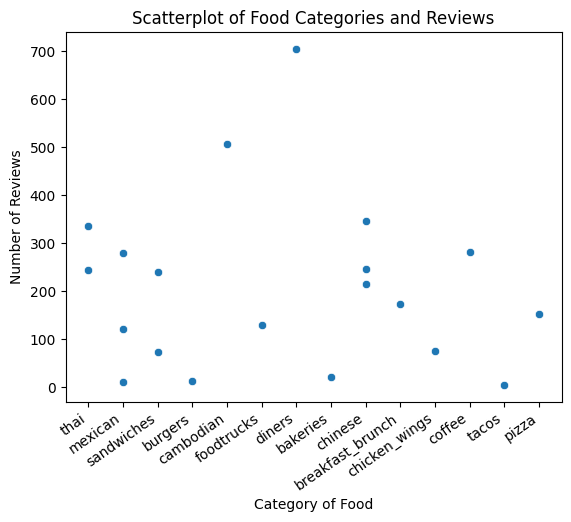

In [41]:
sns.scatterplot(x="category",y="review_count", data=df_yelp)
# Labels for x,y and chart title
plt.xlabel('Category of Food')
plt.ylabel('Number of Reviews')
plt.title('Scatterplot of Food Categories and Reviews')
# Fix overlapping labels
plt.xticks(rotation=35, ha='right')  # Rotate labels by 35 degrees

#### EDA/Scatterplot Explaination

Based on the above data visualization I can see that certain categories of food with a strong winner (diners) have the most reviews. This could mean that people feel compelled to review this type of establishment good or bad, or perhaps they have a promotion where they have some incentive to leave a yelp review and thus we know the promo is effective.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [11]:
import sqlite3

# This will store data for the 3 apis that i am working with (yelp, citybikes, foursquare)
database_name = 'api_data.db'
#need to specify an absolute path, as it created this in the notebook directory and i moved it manually
#database_path = rf"f..\data\{database_name}"

# Connect to the SQLite database (this will create the database if it doesn't exist)
conn = sqlite3.connect(database_name)
print(f"{database_name}, {conn}")

# Create a cursor object
cursor = conn.cursor()

df_bikes.to_sql('bike_data', conn, index=False, if_exists='replace')  
df_foursquare.to_sql('foursquare_data', conn, index=False, if_exists='replace')  
df_yelp.to_sql('yelp_data', conn, index=False, if_exists='replace')  
#api_data_all.to_sql('combined_apis.csv', conn, index=False, if_exists='replace')  

# Execute a query, for example, to get the list of tables
#cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#cursor.execute("SELECT * FROM bike_data LIMIT 10;")
#cursor.execute("SELECT * FROM yelp_data LIMIT 10;")
#cursor.execute("SELECT * FROM foursquare_data LIMIT 10;")
# Assuming bike_data and yelp_data have a common_column
query = """
    SELECT *
    FROM bike_data
    INNER JOIN yelp_data ON bike_data.City = yelp_data.city
    LIMIT 10;
"""

# Execute the query
cursor.execute(query)

# Fetch all the results
fetchedData = cursor.fetchall()

# Display the results
for row in fetchedData:
    print(row)




# Print the list of tables
#print(fetchedData)


# Close the connection
conn.close()

api_data.db, <sqlite3.Connection object at 0x000001A829205030>
('San Francisco Bay Area, CA', 37.849735, -122.270582, 5, 10, 15, 'San Francisco Bay Area, CA', 'CA', 'Bombera', 278, 4.0, 37.79953, -122.2152, 'mexican')
('San Francisco Bay Area, CA', 37.849735, -122.270582, 5, 10, 15, 'San Francisco Bay Area, CA', 'CA', 'Boriqua Kitchen', 128, 4.5, 37.80413712394768, -122.20703466163918, 'foodtrucks')
('San Francisco Bay Area, CA', 37.849735, -122.270582, 5, 10, 15, 'San Francisco Bay Area, CA', 'CA', 'Cafe Noir', 11, 5.0, 37.798756, -122.208274, 'burgers')
('San Francisco Bay Area, CA', 37.849735, -122.270582, 5, 10, 15, 'San Francisco Bay Area, CA', 'CA', 'Cafe of the Bay', 172, 3.0, 37.7903617155944, -122.197740160303, 'breakfast_brunch')
('San Francisco Bay Area, CA', 37.849735, -122.270582, 5, 10, 15, 'San Francisco Bay Area, CA', 'CA', "Domino's Pizza", 152, 1.5, 37.79239111935187, -122.19966241522567, 'pizza')
('San Francisco Bay Area, CA', 37.849735, -122.270582, 5, 10, 15, 'San 

#### Look at the data before and after the join to validate your data.

I was unable to union because the tables column are not compatible. Also I could not perform a SQL join as there is no common key that matches all tables. Database would require more finnagling before this would work.